# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la curva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

# ¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



- Es esta primer parte el objetivo es entender cómo empezó la pandemia, es decir, estudiar la etapa de “crecimiento exponencial” de la misma. La idea es que comprendas qué parámetro guía esto y de qué depende. 
- Luego, intentar entender si se puede predecir el comportamiento global de la pandemia a partir del estudio de unos pocos países bien elegidos 

# Primera parte: ¿Cómo empezó la pandemia?

En la primera parte el objetivo del proyecto es entender cómo empezó la pandemia, es decir, estudiar la etapa de “crecimiento exponencial” de la misma. La idea es que comprendas qué parámetro guía esto y de qué depende. Luego, tienes que intentar entender si puedes predecir el comportamiento global de la pandemia a partir del estudio de unos pocos países bien elegidos y utilizando herramientas estadísticas estudiadas en este sprint.

- Dataset. En este link puedes encontrar el dataset de cantidad de contagios en cada país del mundo. Descárgalo en formato .csv y ponlo en una carpeta de Drive para luego trabajar con él. En el notebook se muestra cómo cargar los datos desde tu Drive usando la librería pandas.

- Notebook. Aquí te dejamos un notebook con algunas recomendaciones y líneas de código para que empieces a explorar los datos.


# Parte 1 - Exploración de Datos y estudio de la etapa exponencial
- El análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.
- Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.
- Debes entender el rol del parámetro k y ver si es posible entender el k mundial a partir de analizar una población de países.
- Justifica cada una de las respuestas.


In [1]:
# Comienzo importando las librerias que voy necesitando para realizar el Sprint 4 
# ==============================================================================
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
# Cargo el dataset con la informacion a utilizar
# ==============================================================================
datos=pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_JUAN/covid-tests-cases-deaths.csv')
datos.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,2020-03-23,NaN,NaN,1.0,40.0
1,Afghanistan,AFG,2020-03-24,NaN,NaN,1.0,42.0
2,Afghanistan,AFG,2020-03-25,NaN,NaN,1.0,74.0
3,Afghanistan,AFG,2020-03-26,NaN,NaN,2.0,80.0
4,Afghanistan,AFG,2020-03-27,NaN,NaN,2.0,91.0
5,Afghanistan,AFG,2020-03-28,NaN,NaN,2.0,106.0
6,Afghanistan,AFG,2020-03-29,NaN,NaN,4.0,114.0
7,Afghanistan,AFG,2020-03-30,NaN,NaN,4.0,114.0
8,Afghanistan,AFG,2020-03-31,NaN,NaN,4.0,166.0
9,Afghanistan,AFG,2020-04-01,NaN,NaN,4.0,192.0


In [185]:
# Observo la cantidad de filas y columnas del dataset
# ==============================================================================
print('El dataset tiene', datos.shape[0], 'filas y' , datos.shape[1], 'columnas')

El dataset tiene 135124 filas y 7 columnas


In [186]:
# Chequeo la lista de paises que estan en esta base de datos
# ==============================================================================
paises_covid = (datos['Entity'].unique())
paises_covid

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Asia excl. China', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Canada, people tested', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',

In [187]:
# Chequeo la cantidad de paises que estan en esta base de datos
# ==============================================================================
print('La cantidad de paises es',len(datos['Entity'].unique())) #vemos cuantos nombres de paises diferentes hay

La cantidad de paises es 215


In [268]:
#Para observar los nombres de columnas 
# ==============================================================================
lista = list(datos.columns)
print(lista)

['Entity', 'Code', 'Day', 'total_tests', '142601-annotations', 'Total confirmed deaths due to COVID-19', 'Total confirmed cases of COVID-19']


Puedo observar que en las columnas de mas interes son *'Entity'* en donde estan los paises, el total de testeos en *'total test'*, la fecha en *'Day'*, en *'Code'* el codigo o abreviatura del pais, en *'Total confirmed deaths due to COVID-19'* las muertes confimadas de covid y en *'Total confirmed cases of COVID-19'* los casos confimados de covid.

En este [link](https://github.com/owid/covid-19-data/blob/master/public/data/README.md) puede observase el detalle de las bases de datos, columnas y variables y de donde provienen los datos de la pandemia

# Datos de la pandemia mundial

In [188]:
# Cargo el vector de paises
# ==============================================================================
paises=datos['Entity'] 

# Carga vector todos los casos confirmados
# ==============================================================================
confirmados=datos['Total confirmed cases of COVID-19'] 

In [189]:
# Genero un indice y guardo en variables la cantidad de casos respecto a dias seleccionados
# ==============================================================================
ind_world=np.where(paises=='World')
ind_world=ind_world[0]
casos_world=confirmados[ind_world]
dias_world=np.arange(0,len(casos_world))

Text(0.5, 1.0, 'Cantidad de casos acumulado del Mundo')

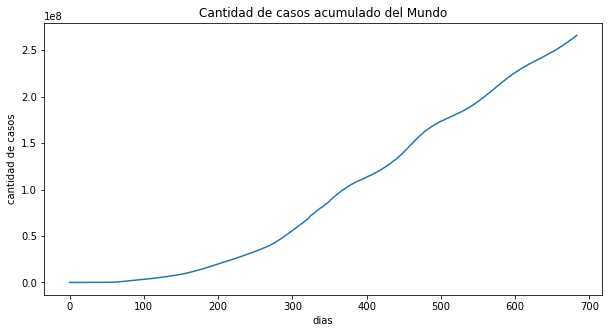

In [190]:
# Genero el plot de casos acumulados en el mundo en los 700 dias estudiados
# ==============================================================================
plt.figure(figsize = (10,5))
plt.plot(dias_world,casos_world)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos acumulado del Mundo')

Text(0.5, 1.0, 'Cantidad de casos acumulado del Mundo')

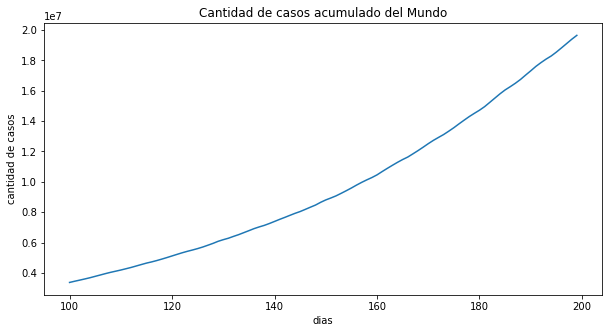

In [191]:
# Busco una ventana de tiempo en donde los casos se vean de manera exponencial
# ==============================================================================
casos_principio = casos_world[100:200]
dias_principio = dias_world[100:200]

# Ploteo
# ==============================================================================
plt.figure(figsize = (10,5))
plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos acumulado del Mundo')

Text(0.5, 1.0, 'Log Cantidad de casos acumulado del Mundo')

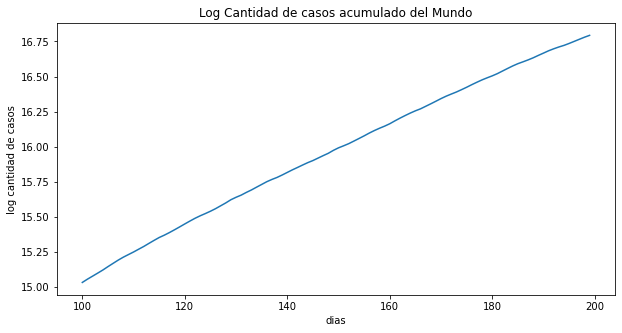

In [192]:
# Realizo un plot con el logaritmo de los casos seleccionados en la ventana de tiempo
# ==============================================================================
plt.figure(figsize = (10,5))
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Log Cantidad de casos acumulado del Mundo')

Los datos pasados a una escala logarítmica cambia significativamente en su visualizacion. Cuando hablamos de escala logarítmica hablamos de una gráfica en la que la distancia entre países con diferentes cantidad de casos, por ejemplo 100 a 1000, es la misma que entre países que tengan por ejemplo 1000 y 10000, porque el tiempo que se necesita para pasar de unos a otros es el mismo. Con este tipo de gráfico es mucho mas fácil identificar un fenómeno exponencial porque los datos dibujan una línea recta al pasarlos a una escala logaritmica. En sintesis, busco una lineal con el logaritmo de los casos, y asi puedo saber que los datos que proviene en esa ventana de tiempo son una exponencial, que es en donde la cantidad de casos se multiplica dia tras dia.

In [193]:
# Definimos función para ajustar modelo
# ==============================================================================
def exponencial(t,k,t0):
  C = np.exp(k*(t-t0))
  return C

In [194]:
# Ajustamos la funcion mediante curve fit
# ==============================================================================
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt

array([ 1.71264047e-02, -7.83182803e+02])

Text(0.5, 1.0, 'Cantidad de casos simulados y reales del Mundo')

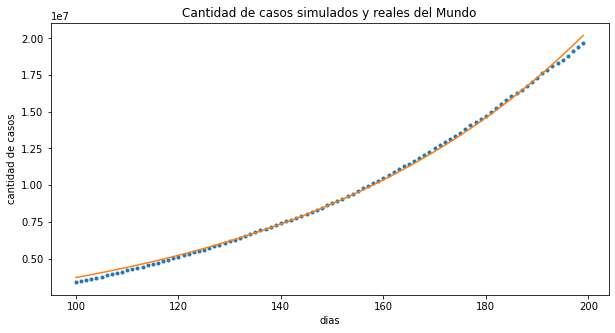

In [195]:
# Ahora de acuerdo a la funcion vemos como ajustan los casos simulados a los reales
# ==============================================================================
k_mundo = popt[0]
t0 = popt[1]
casos_simu = exponencial(dias_principio, k_mundo, t0)


# Ploteo los resultados
# ==============================================================================
plt.figure(figsize = (10,5))
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos simulados y reales del Mundo')

In [196]:
# Observo el k de los paises parcialmente seleccionados del mundo
# ==============================================================================
k_mundo

0.017126404714268968

In [197]:
# Defino una funcion para calculor los posibles casos nuevos
# ==============================================================================
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1
  return nuevos   

Text(0.5, 1.0, 'Cantidad de casos simulados y reales del Mundo')

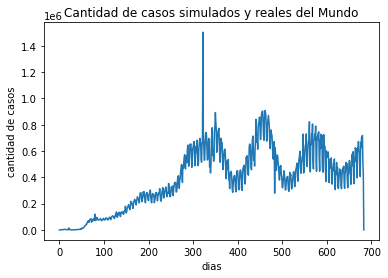

In [198]:
# Ploteo los resultados de los casos nuevos
# ==============================================================================
casos_mundo = np.array(casos_world)
nuevos_mundo = casos_nuevos(casos_mundo)
plt.plot(nuevos_mundo)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos simulados y reales del Mundo')

# Selecciono un pais en particular para observar el comportameinto de la pandemia

In [270]:
# Genero un indice y guardo en variables la cantidad de casos respecto a dias seleccionados
# ==============================================================================
ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias_arg=np.arange(0,len(casos_arg))

Text(0.5, 1.0, 'Cantidad de casos acumulado del Arg')

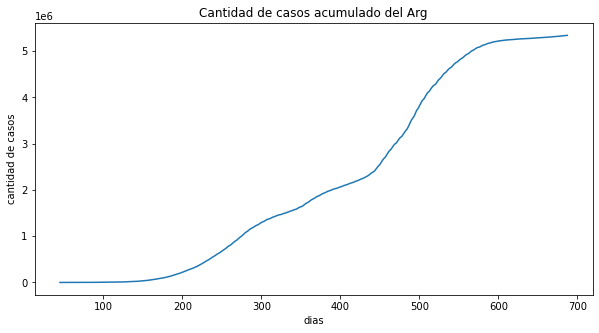

In [271]:
# Genero el plot de casos acumulados de Arg
# ==============================================================================
plt.figure(figsize = (10,5))
plt.plot(dias_arg,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos acumulado del Arg')

Text(0.5, 1.0, 'Cantidad de casos acumulado de Arg')

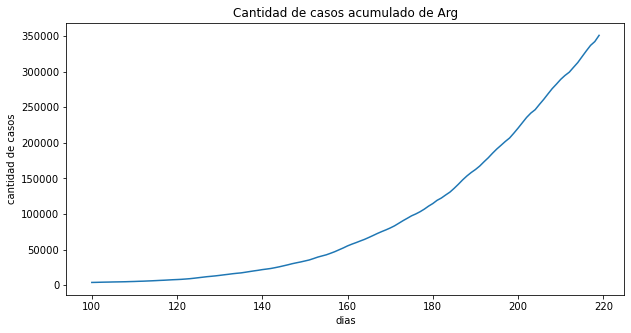

In [287]:
# Busco una ventana de tiempo en donde los casos se vean de manera exponencial
# ==============================================================================
casos_principio = casos_arg[100:220]
dias_principio = dias_arg[100:220]

# Ploteo
# ==============================================================================
plt.figure(figsize = (10,5))
plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos acumulado de Arg')

Text(0.5, 1.0, 'Log Cantidad de casos acumulado de Arg')

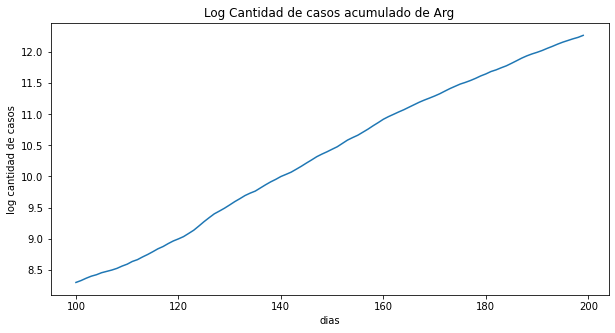

In [274]:
# Realizo un plot con el logaritmo de los casos seleccionados en la ventana de tiempo
# ==============================================================================
plt.figure(figsize = (10,5))
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Log Cantidad de casos acumulado de Arg')

In [288]:
# Definimos función para ajustar modelo
# ==============================================================================
def exponencial(t,k,t0):
  C = np.exp(k*(t-t0))
  return C

In [289]:
# Ajustamos la funcion mediante curve fit
# ==============================================================================
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt

array([ 3.14123167e-02, -1.89871922e+02])

Text(0.5, 1.0, 'Cantidad de casos simulados y reales de Arg')

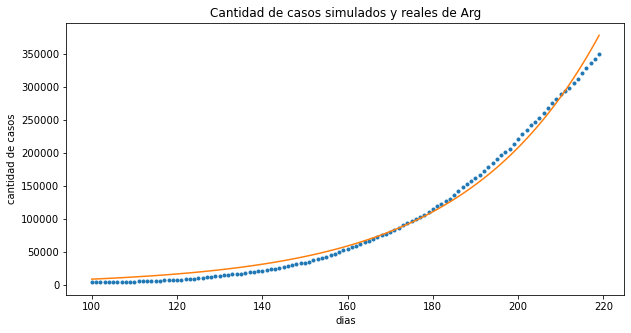

In [290]:
# Ahora de acuerdo a la funcion vemos como ajustan los casos simulados a los reales
# ==============================================================================
k_arg = popt[0]
t0 = popt[1]
casos_simu = exponencial(dias_principio, k_arg, t0)


# Ploteo los resultados
# ==============================================================================
plt.figure(figsize = (10,5))
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos simulados y reales de Arg')

In [291]:
# Observo el k de los paises parcialmente seleccionados del mundo
# ==============================================================================
k_arg

0.03141231665068783

Text(0.5, 1.0, 'Cantidad de casos simulados y reales de Arg')

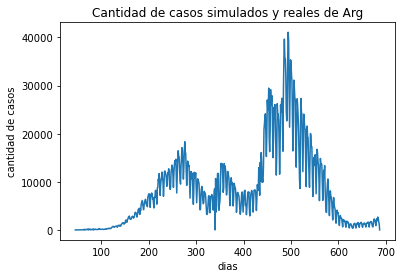

In [292]:
# Ploteo los resultados de los casos nuevos
# ==============================================================================
casos_argentina = np.array(casos_arg)
nuevos_argentina = casos_nuevos(casos_argentina)
plt.plot(nuevos_argentina)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos simulados y reales de Arg')

Asi pude analizar y visualizar los datos para en el caso en particular de Argentina. Puedo observar obviamente que la cantidad de casos nuevos difiere del mundo por tratarse de un pais en particular, y que fue aplicando diferentes politicas restrictivas para el control de los casos. Esto hace que el k obtenido sea 0.0314 y difiere del obtenido con el k del mundo que es de 0.0171. Esto puede debere a que la cantidad de casos no empezo en el mismo momento para todos los paises y con diferente intensidad, ya que la informacion sobre la pandemia como los casos se fueron distribuyendo mas rapido en los paises del norte y no tanto en los pases del sur, y eso puede generar que el k del mundo sea mucho mas bajo que en este caso el de Argentina.


Para ver en profundidad selecciono mas paises para observar si el valor de k se acerca al establecido para el mundo o si varia de acuerdo a la seleccion de paises. Para esto defino una funcion para autimatizar el analisis

Defino una funcion para poder visualizar varios paises a la vez

In [199]:
# Defino la funcion a utilizar
# ==============================================================================
def casos_covid(pais,dia_inicio, dia_fin):
    ind=np.where(paises==pais)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]

    plt.figure(figsize = (20,8))
    plt.subplot(2,4,1)
    plt.plot(dias,casos)
    plt.title(pais)
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de casos')

    plt.subplot(2,4,2)
    plt.plot(dias,np.log(casos))
    plt.title(pais)
    plt.xlabel('Dias')
    plt.ylabel('Log cantidad de casos')

    plt.subplot(2,4,3)
    plt.plot(dias_principio,casos_principio)
    plt.title(pais)
    plt.xlabel('Dias seleccionados')
    plt.ylabel('Cantidad de casos')

    plt.subplot(2,4,4)
    plt.plot(dias_principio,np.log(casos_principio))
    plt.title(pais)
    plt.xlabel('Dias seleccionados')
    plt.ylabel('Log cantidad de casos')

Una vez definida la funcion selecciono mas paises para complementar el analisis hecho con el mundo en total y con la argentina en particular. 

Seleccione en total 10 paises (*Argentina, United States, Japan, Mexico, Brazil, Italy, China, Sweden, South Korea, y Norway*), y estos en particular ya que por lo que estuve investigando cada uno adopto diferentes politicas como cuarentena (China, Argentina, Italia, Mexico) o no cuarentena (Estados Unidos, Suecia, Brasil) como para tener paises con diferentes enfoque frente a la pandemia y que ademas los casos comenzaron y fueron variando en su cantidad en diferentes momentos. Esto permite tener diferentes datos que abarquen diferentes situaciones de la pandemia del mundo para tratar de buscar algo de lo mas representativo de la pandemia.

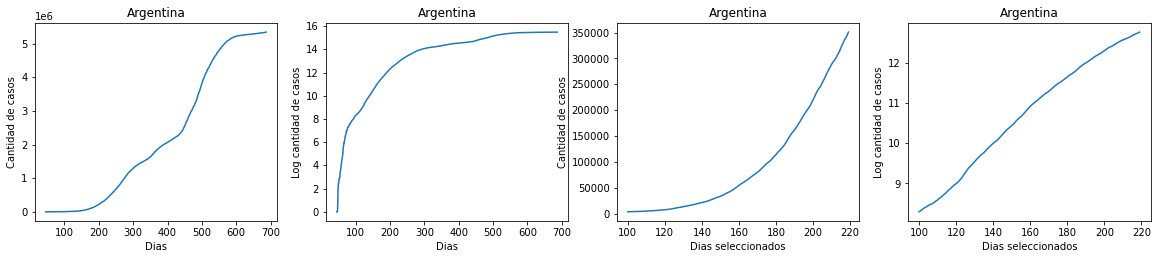

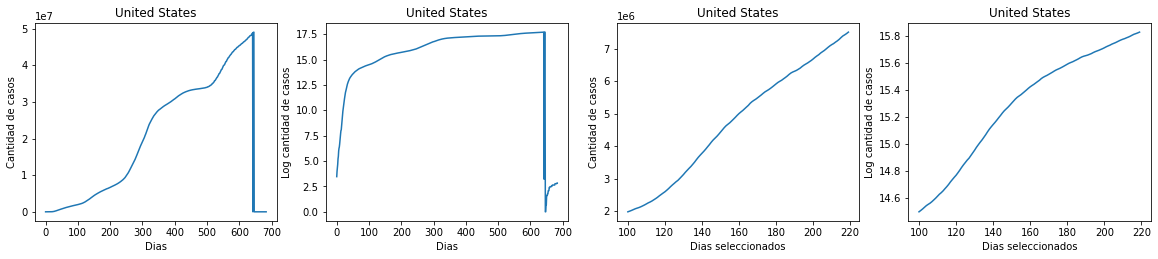

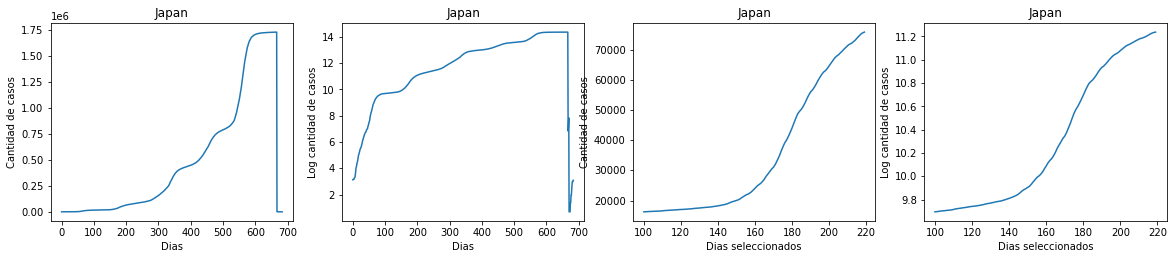

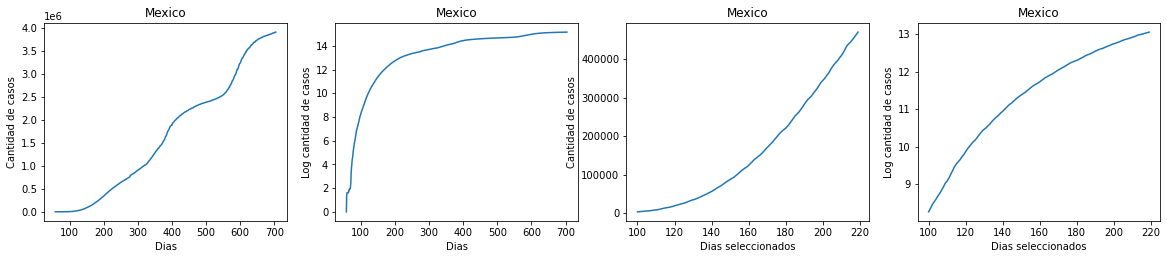

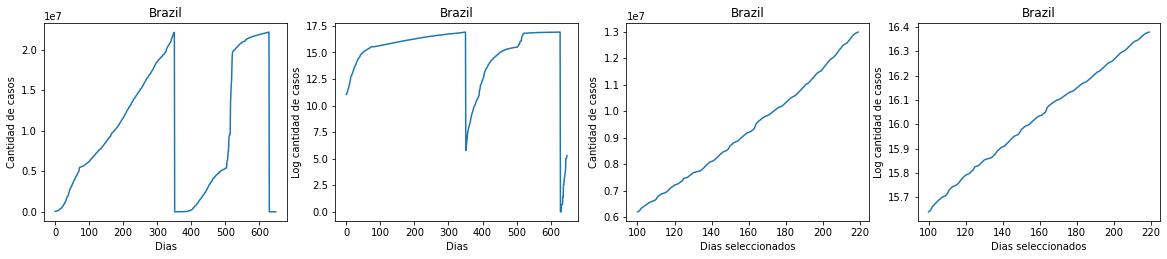

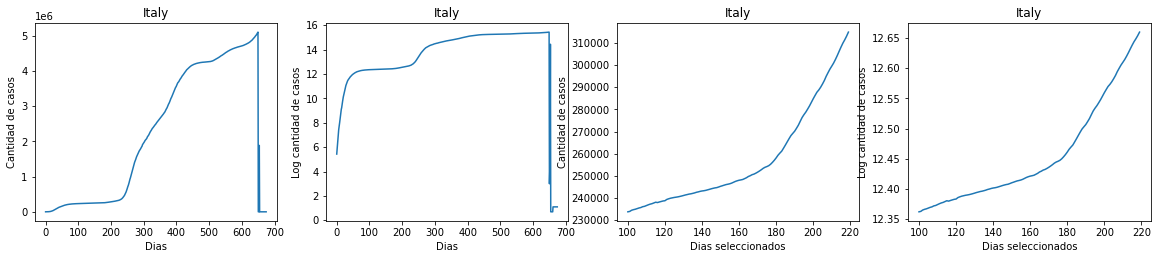

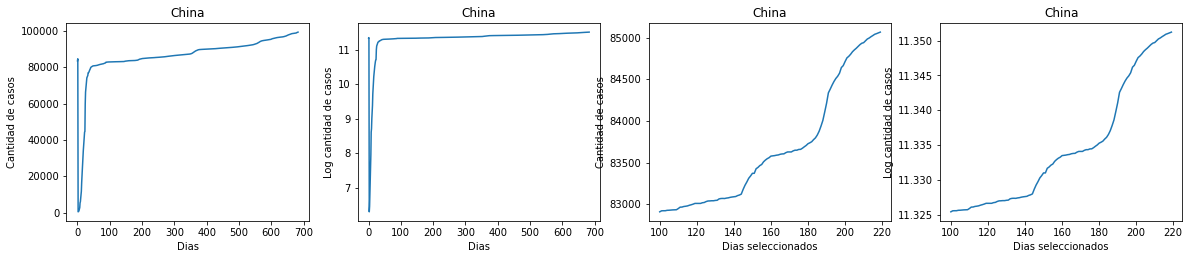

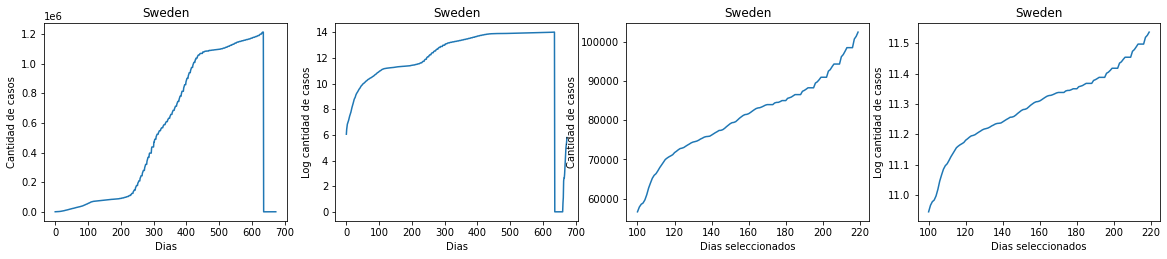

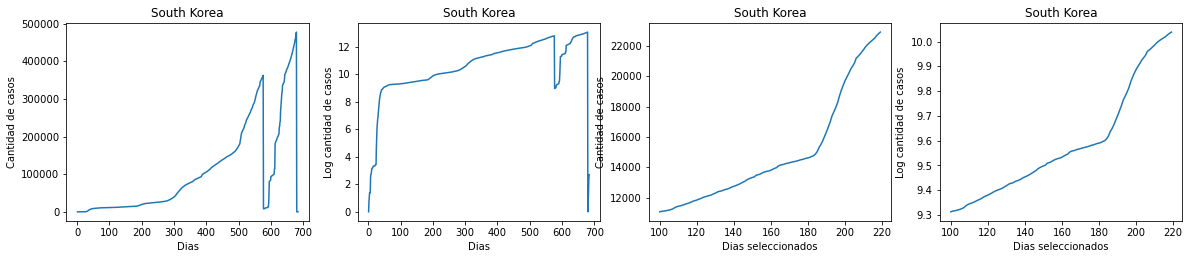

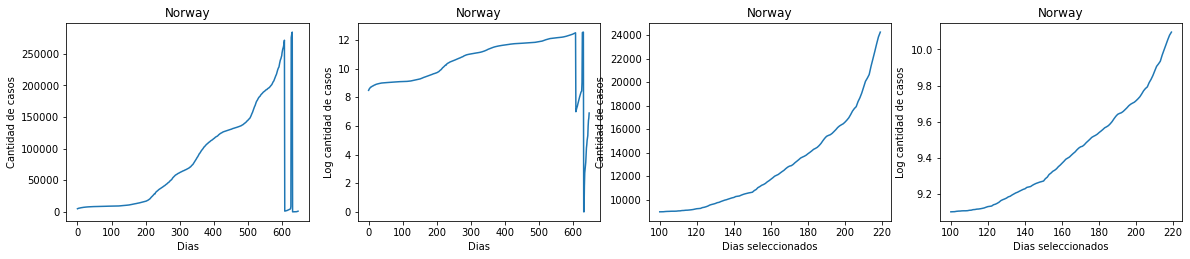

In [316]:
# Pruebo la funcion con una lista de 10 paises seleccionados que tuvieron diferentes politicas frente al covid
# ==============================================================================
pais = ['Argentina', 'United States','Japan','Mexico', 'Brazil', 'Italy', 'China', 'Sweden', 'South Korea', 'Norway']

#En funcion a lo que se vio en el mundo y arg selecciono una ventana de tiempo de 100 a 220 dias
# ==============================================================================
for i in pais:
    casos_covid(i,100 , 220) 

Valor de k para Argentina : 0.03141231665068783
Valor de k para United States : 0.009976759527156839
Valor de k para Japan : 0.017625539709442587
Valor de k para Mexico : 0.024526384237658627
Valor de k para Brazil : 0.006048582657591771
Valor de k para Italy : 0.0023360321404267354
Valor de k para China : 0.00023168106496581636
Valor de k para Sweden : 0.0035213830720330166
Valor de k para South Korea : 0.006618659388192563
Valor de k para Norway : 0.008709272205529861


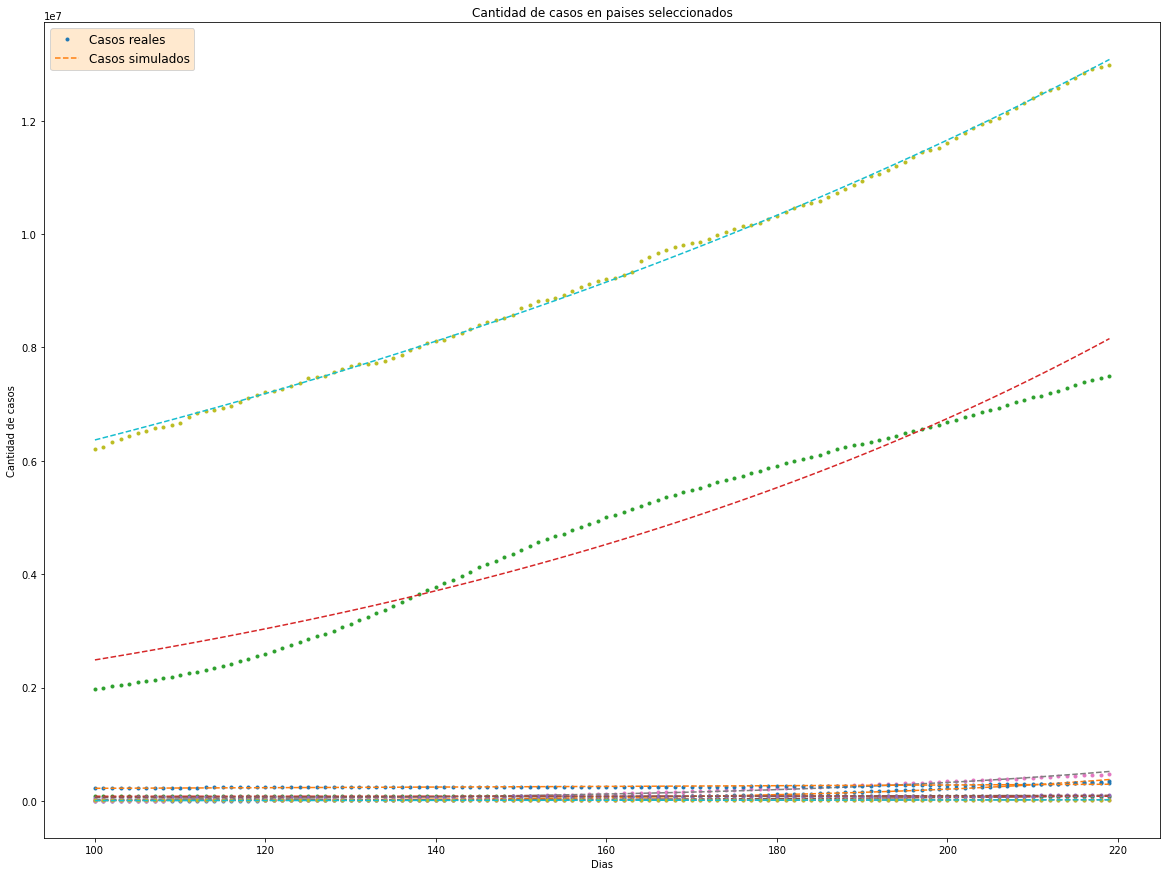

In [317]:
# Pruebo la funcion con la lista de 10 paises seleccionados con ventana de 100 a 220 y grafico los k
# ==============================================================================
dia_inicio = 100
dia_fin = 220
k_10_paises=[]
plt.figure(figsize=(20,15))

for i in pais:
    ind=np.where(paises==i)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 10000000) 
    
    k=popt[0]
    t0=popt[1]
    k_10_paises.append(k)
    casos_simu=exponencial(dias_principio,k,t0)
    
    plt.plot(dias_principio,casos_principio,'.')
    plt.plot(dias_principio,casos_simu,'--')
    plt.legend(['Casos reales', 'Casos simulados'], fontsize=12, facecolor='grey')
    plt.legend(['Casos reales', 'Casos simulados'], fontsize=12, facecolor='bisque')
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de casos')
    plt.title('Cantidad de casos en paises seleccionados')
    print("Valor de k para", i,":", k)


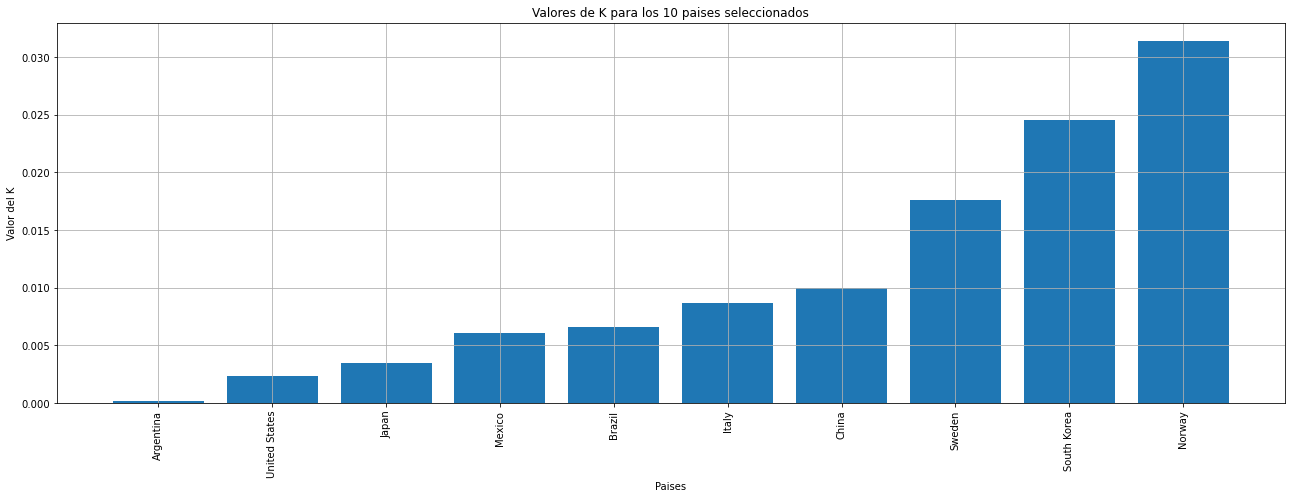

In [326]:
# Grafico los k de los 10 paises
# ==============================================================================
plt.figure(figsize=(22,7))
plt.bar(x=pais, height=sorted(k_10_paises))
plt.xlabel('Paises')
plt.ylabel('Valor del K')
plt.title('Valores de K para los 10 paises seleccionados')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Una vez obtenido el k para estos diez paises, calculo el intervalo de confianza

## Calculo el Intervalo de Confianza (IC) para el valor de K de los 10 paises seleccionados

In [293]:
# Defino los valores de k y z para estimar el IC
# ==============================================================================
datos_k = k_10_paises
z= abs(stats.norm.ppf(0.05/2))
print(z)
n=len(datos_k)
n
# datos_k

1.9599639845400545


10

In [294]:
# Genero la media de los datos y el desvio
# ==============================================================================
mu_muestra=np.mean(datos_k)
sigma_muestra=np.std(datos_k)
print(mu_muestra)
print(sigma_muestra)

0.011100661065368566
0.009697319570870715


In [295]:
# Calculo el intercalo de confianza con la siguiente formula
# ==============================================================================
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)

[0.005090310568673094, 0.017111011562064037]


In [296]:
# Observo la diferencia entre los valores extremos del intervalo
# ==============================================================================
int_conf[1]-int_conf[0]

0.012020700993390943

In [297]:
# Comparo con el k del mundo obtenido previamente
# ==============================================================================
k_mundo 

0.017126404714268968

El k del mundo queda por fuera del intervalo de confianza por los valores maximos del intervalo pero por una diferencia minima. Se podria decir que el valor de k calculado para esos diez paises mas su intevalo de confianza sirve en cierta parte para estimar un valor medio de k para el intevalo en donde podria caer el valor de k de un pais en particular en estudio.


Para ver si puedo hacer mas efectivo el intervalo de confianza disminuyendo su maximo y minimo en el rango, selecciono al azar mucho mas paises para profundizar el analisis y asi compararlo con los valor obtenidos en los analisis previos.

Para eso defino nuevamente una variable con los paises seleccionados y genereno nuevamente el analisis.

In [207]:
# Busco y selecciono mas cantidad de paises para estimar de mejor manera el k
# ==============================================================================
pais_covid = ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola','Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia', 'Asia excl. China', 'Australia', 'Austria', 'Azerbaijan','Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia','Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
'Canada', 'Cape Verde','Central African Republic', 'Chad', 'Chile', 'China', 'Colombia','Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo','Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia','Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany','Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'High income', 'Honduras','Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
'International', 'Iran', 'Iraq', 'Ireland', 'Israel','Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Low income', 'Lower middle income', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
'Mali', 'Malta', 'Mauritania', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North America', 'North Macedonia', 'Norway', 'Oceania',
'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia']

Valor de k para Afghanistan : 0.0015343812986528425
Valor de k para Africa : 0.010484569091148598
Valor de k para Albania : 0.01705928493203288
Valor de k para Algeria : 0.00999998584655686
Valor de k para Andorra : 0.0035285043136477285
Valor de k para Angola : 0.023918184670109022
Valor de k para Antigua and Barbuda : 0.0042202270920504836
Valor de k para Argentina : 0.03141231665068783
Valor de k para Armenia : 0.0023618317843053806
Valor de k para Asia : 0.01952819930348373
Valor de k para Asia excl. China : 0.01882159591443984
Valor de k para Australia : 0.004823746008272958
Valor de k para Austria : 0.0212205595588999
Valor de k para Azerbaijan : 1.2999748726742505e-07
Valor de k para Bahamas : 0.029768180610706112
Valor de k para Bahrain : 0.008229845349884773
Valor de k para Bangladesh : 0.009083835496912896
Valor de k para Barbados : 0.006623854433547095
Valor de k para Belarus : 0.00891856045838458
Valor de k para Belgium : 0.00706212933062268
Valor de k para Belize : 0.03301

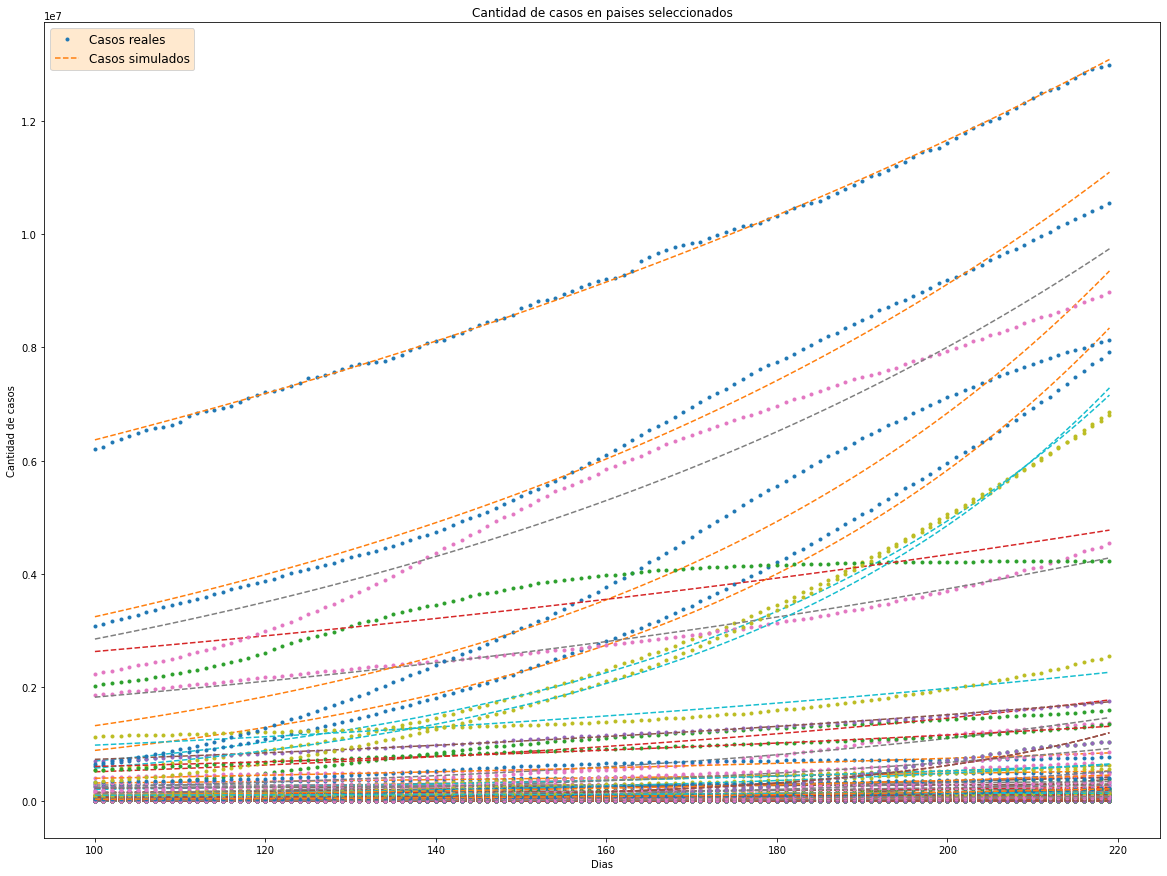

In [310]:
# Pruebo la funcion con la nueva lista de paises seleccionados con ventana de 100 a 220 y grafico los k
# ==============================================================================
pais = pais_covid
dia_inicio = 100
dia_fin = 220
k_nuevos_paises=[]
# paises=[]
plt.figure(figsize=(20,15))

for i in pais:
    ind=np.where(paises==i)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev=10000000) 
    
    k=popt[0]
    t0=popt[1]
    k_nuevos_paises.append(k)
    casos_simu=exponencial(dias_principio,k,t0)
    
    plt.plot(dias_principio,casos_principio,'.')
    plt.plot(dias_principio,casos_simu,'--')
    plt.legend(['Casos reales', 'Casos simulados'], fontsize=12, facecolor='grey')
    plt.legend(['Casos reales', 'Casos simulados'], fontsize=12, facecolor='bisque')
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de casos')
    plt.title('Cantidad de casos en paises seleccionados')
    print("Valor de k para", i,":", k)


In [209]:
# k de los paises
# ==============================================================================
k_nuevos_paises

[0.0015343812986528425,
 0.010484569091148598,
 0.01705928493203288,
 0.00999998584655686,
 0.0035285043136477285,
 0.023918184670109022,
 0.0042202270920504836,
 0.03141231665068783,
 0.0023618317843053806,
 0.01952819930348373,
 0.01882159591443984,
 0.004823746008272958,
 0.0212205595588999,
 1.2999748726742505e-07,
 0.029768180610706112,
 0.008229845349884773,
 0.009083835496912896,
 0.006623854433547095,
 0.00891856045838458,
 0.00706212933062268,
 0.03301497850409848,
 0.004108510053189125,
 0.012251680995535684,
 0.007686419022980313,
 0.018126086122684584,
 0.006048582657591771,
 0.02685213853414569,
 0.009340454900374972,
 0.004565841155141088,
 0.009903255522213222,
 0.0032783191687947907,
 0.003963794468766254,
 0.01433302437603913,
 0.0003723185444692219,
 0.005660840990646736,
 0.004323103215687142,
 0.00023168106496581636,
 0.0073181947606490196,
 0.003770120070655059,
 0.005643562868377827,
 0.02302118833461289,
 0.002474352592678872,
 0.019313700064778335,
 0.0100830910

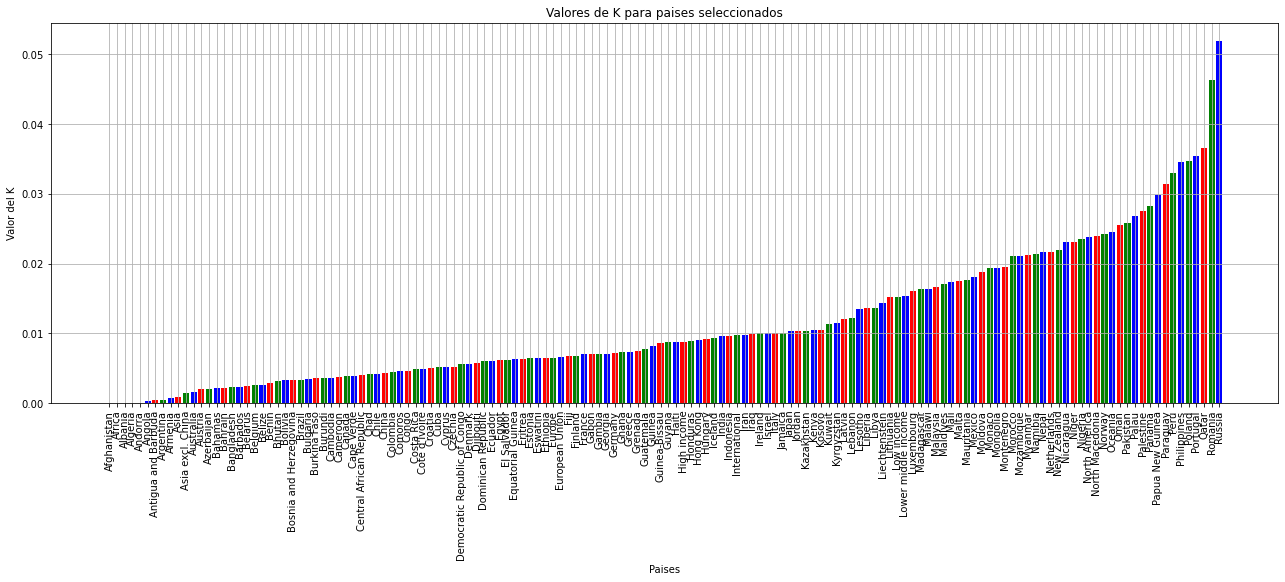

In [324]:
# Grafico los k
# ==============================================================================
plt.figure(figsize=(22,7))
plt.bar(x=pais_covid, height=sorted(k_nuevos_paises), color='rgb')
plt.xlabel('Paises')
plt.ylabel('Valor del K')
plt.title('Valores de K para paises seleccionados')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## Calculo el IC para el valor de K de los nuevos paises seleccionados

In [29]:
# Defino los valores de k y z para estimar el IC
# ==============================================================================
datos_k = k_nuevos_paises
z= abs(stats.norm.ppf(0.05/2))
print(z)
n=len(datos_k)
n

1.9599639845400545


147

In [30]:
# Genero la media de los datos y el desvio
# ==============================================================================
mu_muestra=np.mean(datos_k)
sigma_muestra=np.std(datos_k)
print(mu_muestra)
print(sigma_muestra)

0.011638634545942675
0.009980463237200716


In [31]:
# Calculo el intercalo de confianza con la siguiente formula
# ==============================================================================
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)

[0.01002524171470153, 0.01325202737718382]


In [32]:
# Observo la diferencia entre los valores extremos del intervalo
# ==============================================================================
int_conf[1]-int_conf[0]

0.0032267856624822906

Si comparo con el k del mundo obtenido previamente, este fuera del intervalo de confianza por los valores maximos de este mismo.
Agregar mas paises para el calculo del k hizo mas preciso y pequeño el intervalo de confianza generado. En ambos casos el k del mundo cae por fuera de los intervalos de confianza, aunque los diez paises seleccionados al principio dieron una buena primera aproximacion a lo que podria estimarse entre cantidad de casos de acuerdo al k obtenido y a su intevalo de confianza.

# Segunda parte: Evaluando estrategias

En esta segunda parte tienes más libertad. Debes elegir al menos una estrategia que los estados hayan elegido para enfrentar la pandemia (vacunar o hacer cuarentena) y pensar indicadores del éxito o fracaso de dicha estrategia que se puedan medir en la curva de contagios.

Un ejemplo posible de esto puede ser: si eliges analizar la cuarentena, puedes ver si se redujo el parámetro de crecimiento k (esto está mejor explicado en la primer parte del notebook) o cuánto tardó la curva de nuevos contagios en alcanzar el pico o qué porcentaje de población se contagió.

Una vez que elijas algunos indicadores, busca información sobre países que hayan implementado o no esa estrategia. Por ejemplo, si se trata de la cuarentena, sabemos que China aplicó una cuarentena muy estricta y que Brasil no aplicó esa medida. A partir del estudio de varios ejemplos de cada tipo, debes construir clasificadores por regresión logística, uno por cada indicador que hayas elegido. Allí se debe poder predecir la política aplicada según la medición del indicador.

Un ejemplo podría ser intentar predecir si un país hizo cuarentena a partir de medir el porcentaje de población que se contagió en el momento del pico.

Cuando hayas terminado tu clasificador, úsalo para interpretar los datos de nuevos países, que aún no hayas incluido (recuerda que tienes mucha información en el dataset).


# Parte 2 - Evaluando estrategias
- Debes elegir indicadores que sirvan para clasificar una determinada política pública.
- Debes poder determinar por qué los clasificadores funcionan bien o mal.
- Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar el resultado: ¿coincide con lo que esperabas a partir de tu experiencia con el dataset?


En este caso se seleccionaron 3 politicas de estados para poder agregar al dataset y poder hacer un modelo de prediccion. Estas fueron extraidas del siguiente [link.](https://ourworldindata.org/policy-responses-covid)

Las politicas seleccionadas fueron:
- Cuarentena (stay-at-home-covid)
- Cierre de fronteras (international-travel-covid)
- Vacunacion (covid-vaccination-policy)

## Dataset original completo con el agregado de las politicas elegidas

In [33]:
# Cargo nuevamente el dataset completo para agregarle las variables necesarias
# ==============================================================================
datos=pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_JUAN/covid-tests-cases-deaths.csv')
datos.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,2020-03-23,NaN,NaN,1.0,40.0
1,Afghanistan,AFG,2020-03-24,NaN,NaN,1.0,42.0
2,Afghanistan,AFG,2020-03-25,NaN,NaN,1.0,74.0
3,Afghanistan,AFG,2020-03-26,NaN,NaN,2.0,80.0
4,Afghanistan,AFG,2020-03-27,NaN,NaN,2.0,91.0
5,Afghanistan,AFG,2020-03-28,NaN,NaN,2.0,106.0
6,Afghanistan,AFG,2020-03-29,NaN,NaN,4.0,114.0
7,Afghanistan,AFG,2020-03-30,NaN,NaN,4.0,114.0
8,Afghanistan,AFG,2020-03-31,NaN,NaN,4.0,166.0
9,Afghanistan,AFG,2020-04-01,NaN,NaN,4.0,192.0


In [34]:
# Observo la presencia de datos nulos
# ==============================================================================
datos.isnull().sum()

Entity                                        0
Code                                      12532
Day                                           0
total_tests                               75368
142601-annotations                        77144
Total confirmed deaths due to COVID-19    13363
Total confirmed cases of COVID-19          1840
dtype: int64

In [35]:
# Observo la forma del dataset
# ==============================================================================
datos.shape

(135124, 7)

In [36]:
# Elimino los datos nulos pero suplantandolos para que no afecte a mi funcion mas adelante
# ==============================================================================
datos = datos.fillna(0.0001)

A pesar de que el fillna afecta a todas las variables, esto no es impedimento ya que no repercute en las variables de interes para el analisis que se esta buscando y dirigiendo 

In [37]:
# Chequeo si funciono la eliminacion de los nulos
# ==============================================================================
datos.isnull().sum()

Entity                                    0
Code                                      0
Day                                       0
total_tests                               0
142601-annotations                        0
Total confirmed deaths due to COVID-19    0
Total confirmed cases of COVID-19         0
dtype: int64

Para empezar con esta parte de diferentes estrategias y politicas y pensando en el modelo de regresion logistica que se busca realizar, comienzo enfocandome en la variable de cantidad de casos. En esta es reportado la cantidad de casos por dia en cada pais, por lo que realizo diferentes estrategias para menejar los datos, calcular la cantidad de casos por dias restanto el dia actual frente al dia anterios, y luego calucular si la variacion de casos dio negativa por una disminucion de la misma, o positiva por un aumento de la misma. A partir de esta varible establezco con 0 y 1 una variacion binaria de los casos para luego usarla como mi *target* en mi modelo de regresion logistica.

In [39]:
#Este primer comando agrega la columna 'Casos por dia' y calcula los casos diarios restando el dia de hoy al de ayer
# =============================================================================
primero = True

for index, row in datos.iterrows():
    if primero:
        datos.loc[index, "Casos_por_día"] = datos.loc[index, "Total confirmed cases of COVID-19"]
        primero = False
    else:
        datos.loc[index, "Casos_por_día"] = datos.loc[index, "Total confirmed cases of COVID-19"] - datos.loc[index-1, "Total confirmed cases of COVID-19"]

datos.head()

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0,40.0,40.0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0,42.0,2.0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0,74.0,32.0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0,80.0,6.0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0,91.0,11.0


In [40]:
#Aca calculo la variacion de casos entre el paso de los dias
# =============================================================================
primero = True

for index, row in datos.iterrows():
    if primero:
        datos.loc[index, "Variación_casos"] = datos.loc[index, "Casos_por_día"]
        primero = False
    else:
        datos.loc[index, "Variación_casos"] = datos.loc[index, "Casos_por_día"] - datos.loc[index-1, "Casos_por_día"]
        
datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0
135120,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0
135121,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0
135122,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0


In [41]:
#Coloco 0 (aumentan los casos) y 1 (disminuyen los casos) de acuerdo al dia a dia
# =============================================================================
for index, row in datos.iterrows():
    if datos.loc[index, "Variación_casos"] > 0: 
        
        datos.loc[index, "Variacion_Casos_Binaria"] = 0 # MALO – +MUERTOS – +CONTAGIADOS AUMENTAN = 0
    else:
        datos.loc[index, "Variacion_Casos_Binaria"] = 1 # BUENO – +VIVOS – NO CONTAGIO -DISMINUCION CASOS = 1
        
datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0
135120,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0
135121,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0
135122,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0


In [42]:
#Luego en el modelo con los paises seleccionados tendria que chequear lo mismo
# =============================================================================
datos['Variacion_Casos_Binaria'].unique()

array([0., 1.])

### Realizo la misma metodologia antes usada pero para las 'Muertes causadas por Covid'



In [43]:
#Este primer comando agrega la columna 'Muertes por dia' y calcula las muertes diarios restando el dia de hoy al de ayer
# =============================================================================
primero = True

for index, row in datos.iterrows():
    if primero:
        datos.loc[index, "Muertes_por_día"] = datos.loc[index, "Total confirmed deaths due to COVID-19"]
        primero = False
    else:
        datos.loc[index, "Muertes_por_día"] = datos.loc[index, "Total confirmed deaths due to COVID-19"] - datos.loc[index-1, "Total confirmed deaths due to COVID-19"]

datos.head()

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0,40.0,40.0,40.0,0.0,1.0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0,42.0,2.0,-38.0,1.0,0.0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0,74.0,32.0,30.0,0.0,0.0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0,80.0,6.0,-26.0,1.0,1.0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0,91.0,11.0,5.0,0.0,0.0


In [44]:
#Aca calculo la variacion de muertes entre el paso de los dias
# =============================================================================
primero = True

for index, row in datos.iterrows():
    if primero:
        datos.loc[index, "Variación_muertes"] = datos.loc[index, "Muertes_por_día"]
        primero = False
    else:
        datos.loc[index, "Variación_muertes"] = datos.loc[index, "Muertes_por_día"] - datos.loc[index-1, "Muertes_por_día"]
        
datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,1.0000,1.0000
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0.0000,-1.0000
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0.0000,0.0000
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,1.0000,1.0000
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0.0000,-1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,202.0000,202.0000
135120,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,4504.0000,4302.0000
135121,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,-4709.9999,-9213.9999
135122,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0.0000,4709.9999


In [45]:
#Coloco 0 (aumentan las muertes) y 1 (disminuyen las muerte) de acuerdo al dia a dia
# =============================================================================
for index, row in datos.iterrows():
    if datos.loc[index, "Variación_muertes"] > 0: 
        
        datos.loc[index, "Variacion_muertes_Binaria"] = 0 # MALO – +MUERTOS – +CONTAGIADOS AUMENTAN = 0
    else:
        datos.loc[index, "Variacion_muertes_Binaria"] = 1 # BUENO – +VIVOS – NO CONTAGIO -DISMINUCION CASOS = 1
        
datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes,Variacion_muertes_Binaria
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,1.0000,1.0000,0.0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0.0000,-1.0000,1.0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0.0000,0.0000,1.0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,1.0000,1.0000,0.0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0.0000,-1.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,202.0000,202.0000,0.0
135120,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,4504.0000,4302.0000,0.0
135121,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,-4709.9999,-9213.9999,1.0
135122,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0.0000,4709.9999,0.0


In [46]:
#Luego en el modelo con los paises seleccionados tendria que chequear lo mismo
# =============================================================================
datos['Variacion_muertes_Binaria'].unique()

array([0., 1.])

Una vez realizado todo este procesamiento de los datos sumo a mi dataset 3 columnas mas con las variables de interes que se relacionan a diferentes politicas utilizadas por los paises. Esta se le agregara al dataset original y completo para luego seleccionar paises de interes.

Las politicas seleccionadas fueron las de *Cuarentena*, *Cierre de frontera* y *Vacunacion*.

Estas fueron extraidas del siguiente [link](https://ourworldindata.org/policy-responses-covid) como antes fue mencionado.

In [47]:
#Cargo los dataset de las 3 politicas seleccionadas
# =============================================================================
df_cuarentena = pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_politicas/stay-at-home-covid.csv')
df_cuarentena.head(10)

df_vuelos_int = pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_politicas/international-travel-covid.csv')
df_vuelos_int.head(10)

df_vacunacion = pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_politicas/covid-vaccination-policy.csv')
df_vacunacion.head(10)

,Entity,Code,Day,vaccination_policy
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
5,Afghanistan,AFG,2020-01-06,0
6,Afghanistan,AFG,2020-01-07,0
7,Afghanistan,AFG,2020-01-08,0
8,Afghanistan,AFG,2020-01-09,0
9,Afghanistan,AFG,2020-01-10,0


Observo cada una y elimino la columna de 'Code'

In [48]:
#Cuarentena
# =============================================================================
df_cuarentena = df_cuarentena.drop(columns = ['Code'])
df_cuarentena

,Entity,Day,stay_home_requirements
0,Afghanistan,2020-01-01,0
1,Afghanistan,2020-01-02,0
2,Afghanistan,2020-01-03,0
3,Afghanistan,2020-01-04,0
4,Afghanistan,2020-01-05,0
...,...,...,...
136982,Zimbabwe,2022-01-04,2
136983,Zimbabwe,2022-01-05,2
136984,Zimbabwe,2022-01-06,2
136985,Zimbabwe,2022-01-07,2


In [49]:
# Cierre de fronteras
# =============================================================================
df_vuelos_int = df_vuelos_int.drop(columns = ['Code'])
df_vuelos_int

,Entity,Day,international_travel_controls
0,Afghanistan,2020-01-01,0
1,Afghanistan,2020-01-02,0
2,Afghanistan,2020-01-03,0
3,Afghanistan,2020-01-04,0
4,Afghanistan,2020-01-05,0
...,...,...,...
137056,Zimbabwe,2022-01-04,2
137057,Zimbabwe,2022-01-05,2
137058,Zimbabwe,2022-01-06,2
137059,Zimbabwe,2022-01-07,2


In [50]:
# Vacunacion
# =============================================================================
df_vacunacion = df_vacunacion.drop(columns = ['Code'])
df_vacunacion

,Entity,Day,vaccination_policy
0,Afghanistan,2020-01-01,0
1,Afghanistan,2020-01-02,0
2,Afghanistan,2020-01-03,0
3,Afghanistan,2020-01-04,0
4,Afghanistan,2020-01-05,0
...,...,...,...
137052,Zimbabwe,2022-01-04,5
137053,Zimbabwe,2022-01-05,5
137054,Zimbabwe,2022-01-06,5
137055,Zimbabwe,2022-01-07,5


A traves de la utilizacion de merge genero un dataset final con las 3 variables conjuntas para tener listo los datos para su utilizacion en el modelo de prediccion

In [51]:
# Junto las 3 politicas al dataset previo con todos los paises usando merge
# =============================================================================
datos_politicas_1 = pd.merge(datos, df_cuarentena, on=['Day','Entity'])
datos_politicas_2 = pd.merge(datos_politicas_1, df_vuelos_int, on=['Day','Entity'])
datos_politicas_3 = pd.merge(datos_politicas_2, df_vacunacion, on=['Day','Entity'])

datos_final = datos_politicas_3
datos_final

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,1.0000,1.0000,0.0,0,3,0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0.0000,-1.0000,1.0,0,3,0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0.0000,0.0000,1.0,2,3,0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,1.0000,1.0000,0.0,2,3,0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0.0000,-1.0000,1.0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,202.0000,202.0000,0.0,2,4,0
111504,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,4504.0000,4302.0000,0.0,2,2,5
111505,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,-4709.9999,-9213.9999,1.0,0,1,0
111506,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0.0000,4709.9999,0.0,0,1,0


### Para cada una de las politicas seleccionadas se realizo una linea de corte para definir de manera binaria, con 0 y 1, cada politica o decision de los paises

-------------------------------------------------------------------------------------------------------------------------------

*En el caso de **CUARENTENA** (Stay at home) los valores que tenia era de:*

- 0 - No measures
- 1 - recommend not leaving house
- 2 - require not leaving house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips
- 3 - require not leaving house with minimal exceptions (e.g. allowed to leave only once every few days, or only one person can leave at a time, etc.)
- No data - blank

Se tomo a 0, 1 y 2 como NO CUARENTENA y como CUARENTENA a el valor 3. CUARENTENA se tomo como 1 y NO CUARENTENA como 0. 


-------------------------------------------------------------------------------------------------------------------------------

*En el caso de **CIERRE DE FRONTERAS** (International travel controls) los valores eran:*

- 0 - No measures
- 1 - Screening
- 2 - Quarantine arrivals from high-risk regions
- 3 - Ban on high-risk regions
- 4 - Total border closure
- No data - blank

Se tomo a 0, 1, 2 y 3 como NO CIERRE y como CIERRE DE FRONTERA a el valor 4. CIERRE DE FRONTERA se tomo como 1 y NO CIERRE como 0.

-------------------------------------------------------------------------------------------------------------------------------

*Para el caso de **VACUNACION** (Vaccination policy) los valores eran:*

- 0 - No availability
- 1 - Availability for ONE of the following: key workers/ clinically vulnerable groups / elderly groups
- 2 - Availability for TWO of the following: key workers/ clinically vulnerable groups / elderly groups
- 3 - Availability for ALL the following: key workers/ clinically vulnerable groups / elderly groups
- 4 - Availability for all three, plus partial additional availability (select broad groups/ages)
- 5 - Universal availability

Se tomo a 0, 1, 2 y 3 como NO VACUNACION y como VACUNACION ACTIVA a el valor 4 y 5. VACUNACION ACTIVA se tomo como 1 y como 
NO VACUNACION como 0.

Para poder hacer binaria cada politica se preproceso el dataset para poder establecerlo de esa manera y poder usar el dataset luego en el modelo de regresion logistica.

Estos indicadores a priori sirven ya que se relacionan directamente con las politicas que usaron los diferentes paises para frenar la expansion y aumento de los casos de covid y por ende las muertes causadas por el virus.

In [52]:
# CUARENTENA
# =============================================================================

for index, row in datos_final.iterrows():
    if datos_final.loc[index, 'stay_home_requirements'] == 3: 
        datos_final.loc[index, 'stay_home_requirements'] = 1 # Cuarentena
    else:
        datos_final.loc[index, 'stay_home_requirements'] = 0 # NO Cuarentena
        
datos_final

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,1.0000,1.0000,0.0,0,3,0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0.0000,-1.0000,1.0,0,3,0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0.0000,0.0000,1.0,0,3,0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,1.0000,1.0000,0.0,0,3,0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0.0000,-1.0000,1.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,202.0000,202.0000,0.0,0,4,0
111504,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,4504.0000,4302.0000,0.0,0,2,5
111505,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,-4709.9999,-9213.9999,1.0,0,1,0
111506,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0.0000,4709.9999,0.0,0,1,0


In [53]:
# Chequeo de cuarentena
# =============================================================================
datos_final.stay_home_requirements.unique()

array([0, 1], dtype=int64)

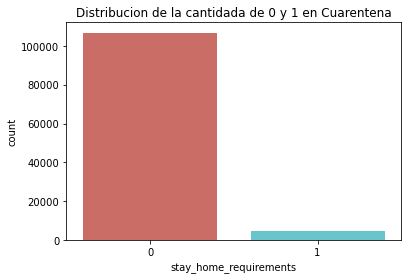

In [303]:
# Grafico la distribucion de la cantidada de 0 y 1 en Cierre de frontera
# =============================================================================
sns.countplot(x=datos_final['stay_home_requirements'], palette='hls')
plt.title('Distribucion de la cantidada de 0 y 1 en Cuarentena')
plt.show()

Puede observarse que tomando la forma binaria establecida la mayoria de los paises no llevaron a cabo una cuarentena estricta para el control de casos de covid

In [54]:
# Cierre de frontera 
# =============================================================================

for index, row in datos_final.iterrows():
    if datos_final.loc[index, 'international_travel_controls'] == 4: 
        datos_final.loc[index, 'international_travel_controls'] = 1 # Cierre de frontera 
    else:
        datos_final.loc[index, 'international_travel_controls'] = 0 # NO Cierre de frontera - Frontera abierta
        
datos_final

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,1.0000,1.0000,0.0,0,0,0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0.0000,-1.0000,1.0,0,0,0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0.0000,0.0000,1.0,0,0,0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,1.0000,1.0000,0.0,0,0,0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0.0000,-1.0000,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,202.0000,202.0000,0.0,0,1,0
111504,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,4504.0000,4302.0000,0.0,0,0,5
111505,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,-4709.9999,-9213.9999,1.0,0,0,0
111506,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0.0000,4709.9999,0.0,0,0,0


In [55]:
# Chequeo de cierre de frontera
# =============================================================================
datos_final.international_travel_controls.unique()

array([0, 1], dtype=int64)

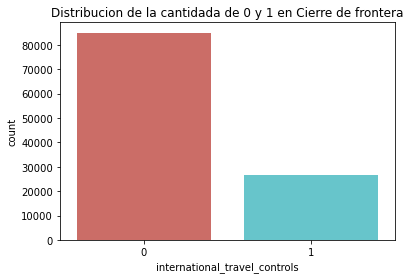

In [301]:
# Grafico la distribucion de la cantidada de 0 y 1 en Cierre de frontera
# =============================================================================
sns.countplot(x=datos_final['international_travel_controls'], palette='hls')
plt.title('Distribucion de la cantidada de 0 y 1 en Cierre de frontera')
plt.show()

Tomando la forma binaria establecida se observa que la mayoria de los paises no llevaron a cabo una cierre total para el control de casos de covid pero con una diferencia menor respecto a lo visualizado con la politica de cuarentena frente a la pandemia

In [56]:
# Vacunacion
# =============================================================================

for index, row in datos_final.iterrows():
    if datos_final.loc[index, 'vaccination_policy'] >= 4: 
        datos_final.loc[index, 'vaccination_policy'] = 1 # Vacunacion ACITVA
    else:
        datos_final.loc[index, 'vaccination_policy'] = 0 # NO Vacunacion
        
datos_final

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,1.0000,1.0000,0.0,0,0,0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0.0000,-1.0000,1.0,0,0,0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0.0000,0.0000,1.0,0,0,0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,1.0000,1.0000,0.0,0,0,0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0.0000,-1.0000,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,202.0000,202.0000,0.0,0,1,0
111504,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,4504.0000,4302.0000,0.0,0,0,1
111505,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,-4709.9999,-9213.9999,1.0,0,0,0
111506,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0.0000,4709.9999,0.0,0,0,0


In [57]:
# Chequeo de vacunacion
# =============================================================================
datos_final.vaccination_policy.unique()

array([0, 1], dtype=int64)

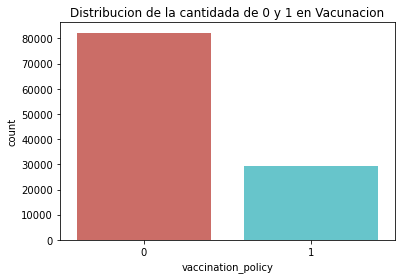

In [302]:
# Grafico la distribucion de la cantidada de 0 y 1 en vacunacion
# =============================================================================
sns.countplot(x=datos_final['vaccination_policy'], palette='hls')
plt.title('Distribucion de la cantidada de 0 y 1 en Vacunacion')
plt.show()

En este caso puedo verse algo similar a los visto para Cierre de fronteras. Tomando la forma binaria establecida se observa que la mayoria de los paises no llevaron una vacunacion de gran escala para el control de casos de covid frente a la panademia

Ahora paso a seleccionar los 10 paises que previamente fueron estudiados para ver como funciona el modelo y que puede observar con las politicas seleccionadas. 

In [58]:
# Selecciono paises para ingresar luego en el modelo
# =============================================================================
paises_a_seleccionar = ['Argentina', 'United States','Japan','Mexico', 'Brazil', 'Italy', 'China', 'Sweden', 'Spain', 'South Korea', 'Norway', 'Australia']
df_paises_selec = datos_final[datos_final['Entity'].isin(paises_a_seleccionar)]
df_paises_selec

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
3220,Argentina,ARG,2020-01-01,4.0000,tests performed,0.0001,0.0001,-14.9999,-14.9999,1.0,0.0,0.0,1.0,0,0,0
3221,Argentina,ARG,2020-01-02,53.0000,tests performed,0.0001,0.0001,0.0000,14.9999,0.0,0.0,0.0,1.0,0,0,0
3222,Argentina,ARG,2020-01-03,58.0000,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0.0,0.0,1.0,0,0,0
3223,Argentina,ARG,2020-01-04,133.0000,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0.0,0.0,1.0,0,0,0
3224,Argentina,ARG,2020-01-05,146.0000,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106684,United States,USA,2020-02-24,0.0001,0.0001,0.0001,16.0000,0.0000,0.0000,1.0,0.0,0.0,1.0,0,0,0
106685,United States,USA,2020-02-25,0.0001,0.0001,0.0001,16.0000,0.0000,0.0000,1.0,0.0,0.0,1.0,0,0,0
106686,United States,USA,2020-02-26,0.0001,0.0001,0.0001,16.0000,0.0000,0.0000,1.0,0.0,0.0,1.0,0,0,0
106687,United States,USA,2020-02-27,0.0001,0.0001,0.0001,17.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,0,0,0


A partir del procesamiento del dataset, las politicas seleccionadas, establecer de manera binarias las mismas y seleccionar los paises de interes puedo empezar a desarrollar un modelo de prediccion.

# Modelo de Regresión Logística - Casos COVID


In [59]:
#importo las librerias
# =============================================================================
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [141]:
#Defino las variables
# =============================================================================
X = df_paises_selec.drop(columns = ['Entity','Code','Day','total_tests','142601-annotations','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19','Casos_por_día','Variación_casos','Variacion_Casos_Binaria', 'Muertes_por_día', 'Variación_muertes', 'Variacion_muertes_Binaria'], axis=1) #aca van los indicarotes/politicas
y = df_paises_selec['Variacion_Casos_Binaria'] #cantidad de casos en binario

In [142]:
X

,stay_home_requirements,international_travel_controls,vaccination_policy
3220,0,0,0
3221,0,0,0
3222,0,0,0
3223,0,0,0
3224,0,0,0
...,...,...,...
106684,0,0,0
106685,0,0,0
106686,0,0,0
106687,0,0,0


In [143]:
y

3220      1.0
3221      0.0
3222      1.0
3223      1.0
3224      1.0
         ... 
106684    1.0
106685    1.0
106686    1.0
106687    0.0
106688    1.0
Name: Variacion_Casos_Binaria, Length: 8131, dtype: float64

In [144]:
print(X.shape, y.shape)

(8131, 3) (8131,)


In [145]:
# Observo si cual es la distribucion de la cantidada de 0 y 1
# =============================================================================
y.value_counts()

1.0    4342
0.0    3789
Name: Variacion_Casos_Binaria, dtype: int64

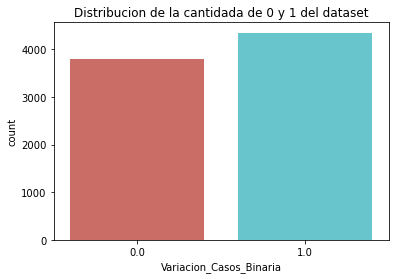

In [304]:
# Grafico la distribucion de la cantidada de 0 y 1
# =============================================================================
sns.countplot(x=y, palette='hls')
plt.title('Distribucion de la cantidada de 0 y 1 del dataset')
plt.show()

Los datos no son balanceados, pero por lo observado este desbalanceo no es demasiado profundo

In [147]:
#Entreno el modelos teniendo dividiento el dataset en un 30% para entrenar (train_test_split)
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5691, 3) (5691,) (2440, 3) (2440,)


In [148]:
#creamos nuestro modelo y hacemos que se ajuste con el fit
# =============================================================================
model_RL = LogisticRegression()
model_RL.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
#hacemos clasificar todo nuestro conjunto de entradas X utilizando el método predict(X)
# =============================================================================
y_pred = model_RL.predict(X_test) #predictions = y_pred
print(y_pred)
y_test

[1. 1. 1. ... 1. 1. 1.]


4522     0.0
13701    1.0
51502    1.0
74707    1.0
50076    0.0
        ... 
4027     1.0
21248    1.0
65988    1.0
3682     1.0
14099    0.0
Name: Variacion_Casos_Binaria, Length: 2440, dtype: float64

In [150]:
# 
# =============================================================================
valor = model_RL.coef_
efectividad_cuarentena = valor[0][0]
efectividad_cierre_frontera = valor[0][1]
efectividad_vacunacion = valor[0][2]

In [151]:
valor

array([[ 0.00781969, -0.15049649,  0.10300199]])

In [152]:
# Observo la efectividad de cada politica seleccionada
# =============================================================================
print('La efectividad de la cuarentena fue del: ' + str(efectividad_cuarentena))
print('La efectividad del cierre de la frontera fue del: ' + str(efectividad_cierre_frontera))
print('La efectividad de la vacunacion fue del: ' + str(efectividad_vacunacion))

La efectividad de la cuarentena fue del: 0.007819693594811813
La efectividad del cierre de la frontera fue del: -0.15049648949878922
La efectividad de la vacunacion fue del: 0.10300199484159982


El mejor predictor para este analisis fue el de vacunacion que es el que mejor funciono, seguido de  cuarentena. Este ultimo es muy pequeño, lo que implica que el efecto o aporte es relativamente pequeño.

En el caso de cierre de frontera el coeficiente es negativo por lo que lo hace un predictor poco probable.

# Reporte de Resultados del Modelo


In [153]:
#Calculo la precisión del modelo
# =============================================================================
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5349061145883486


In [154]:
#Calculo la exactitud del modelo
# =============================================================================
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5266393442622951


In [155]:
# confirmamos cuan bueno fue nuestro modelo utilizando model.score()
# =============================================================================
model_RL.score(X_test,y_test)

0.5266393442622951

In [156]:
#Calculo la sensibilidad del modelo
# =============================================================================
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.8546153846153847


In [157]:
#Calculo el Puntaje F1 del modelo
# Calculemos ahora el puntaje F1 que es una combinación entre la precisión y la sensibilidad
# =============================================================================
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.6579804560260587


In [158]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test, y_pred,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

# izq_sup: datos positivos reales (0)
# der_inf: datos negativos reales (1)
# izq_inf: datos falsos positivos
# der_sup: datos falsos negativos

Predicción,0.0,1.0
Real,,
0.0,174,966
1.0,189,1111


In [305]:
# Reporte total para todo el dataset usado en el modelo
# =============================================================================
predictions = model_RL.predict(X) #predictions = y_pred pero con el total de instancias
print(classification_report(y, predictions)) #ver que es lo que tengo que comparar aca

              precision    recall  f1-score   support

         0.0       0.50      0.16      0.24      3789
         1.0       0.54      0.86      0.66      4342

    accuracy                           0.53      8131
   macro avg       0.52      0.51      0.45      8131
weighted avg       0.52      0.53      0.46      8131



## Optimizacion de hiperparametros del modelo de regresion logistica

In [160]:
#Genero un GridSearch para la optimizacion del Regresión logistica
# =============================================================================
from sklearn.model_selection import GridSearchCV
grid_RL = {'penalty':['l1', 'l2', 'elasticnet'],
           'C':[1.0,2.0, 3.0], 'fit_intercept':[True, False]}

In [161]:
#Grid Search
# =============================================================================
model_RL_OPT = GridSearchCV(model_RL, param_grid=grid_RL, cv=5)

In [162]:
# =============================================================================
import warnings 
warnings.filterwarnings('ignore')

model_RL_OPT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2.0, 3.0], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [163]:
# =============================================================================
print("Mejores parametros: "+str(model_RL_OPT.best_params_)+'\n')
print("Mejor Score: "+str(model_RL_OPT.best_score_)+'\n')
print("Mejor estimador: "+str(model_RL_OPT.best_estimator_)+'\n')

scores_RL_OPT = pd.DataFrame(model_RL_OPT.cv_results_)
scores_RL_OPT.head()

Mejores parametros: {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}

Mejor Score: 0.5331222004317294

Mejor estimador: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001199,0.000400,0.000000,0.000000,1,True,l1,"{'C': 1.0, 'fit_intercept': True, 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.012392,0.004962,0.001999,0.001095,1,True,l2,"{'C': 1.0, 'fit_intercept': True, 'penalty': '...",0.53468,0.536907,0.528120,0.526362,0.539543,0.533122,0.005074,1
2,0.000799,0.000400,0.000000,0.000000,1,True,elasticnet,"{'C': 1.0, 'fit_intercept': True, 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3,0.001200,0.000400,0.000000,0.000000,1,False,l1,"{'C': 1.0, 'fit_intercept': False, 'penalty': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,0.007395,0.001854,0.001200,0.000401,1,False,l2,"{'C': 1.0, 'fit_intercept': False, 'penalty': ...",0.48288,0.521090,0.498243,0.498243,0.498243,0.499739,0.012221,4


In [164]:
#Defino nuevamente el modelo con los hiperparametros optimizados
# =============================================================================
model_RL_OPT_1 = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2')

In [165]:
# Fiteo del X train e y train
# =============================================================================
model_RL_OPT_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
# =============================================================================
model_RL_OPT_1.score(X_test,y_test)

0.5266393442622951

A pesar de buscar y establecer una optimizacion de hiperparametros del modelo de RL, este no arrojo mejores resultados a los antes obtenidos, por lo que se utilizacion de manera prestablecida

# Nuevas predicciones - Clasificación de nuevos paises

In [306]:
# Realizo una prediccio de paises nuevos que no fueron utilizados en el modelo
# =============================================================================
paises_nuevo_seleccionar = ['France', 'Netherlands', 'Canada'] 
Paises_nuevo = datos_final[datos_final['Entity'].isin(paises_nuevo_seleccionar)]
Paises_nuevo

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
18005,Canada,CAN,2020-01-31,0.0000,tests performed,0.0001,4.0,-62.0,-72.0,1.0,0.0,0.0,1.0,0,0,0
18006,Canada,CAN,2020-02-08,63.0000,tests performed,0.0001,7.0,3.0,65.0,0.0,0.0,0.0,1.0,0,0,0
18007,Canada,CAN,2020-02-16,109.0000,tests performed,0.0001,7.0,0.0,-3.0,1.0,0.0,0.0,1.0,0,0,0
18008,Canada,CAN,2020-02-21,166.0000,tests performed,0.0001,9.0,2.0,2.0,0.0,0.0,0.0,1.0,0,0,0
18009,Canada,CAN,2020-02-24,212.0000,tests performed,0.0001,10.0,1.0,-1.0,1.0,0.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72123,Netherlands,NLD,2020-03-01,0.0001,0.0001,0.0001,10.0,4.0,-1.0,1.0,0.0,0.0,1.0,0,0,0
72124,Netherlands,NLD,2020-03-02,0.0001,0.0001,0.0001,18.0,8.0,4.0,0.0,0.0,0.0,1.0,0,0,0
72125,Netherlands,NLD,2020-03-03,0.0001,0.0001,0.0001,24.0,6.0,-2.0,1.0,0.0,0.0,1.0,0,0,0
72126,Netherlands,NLD,2020-03-04,0.0001,0.0001,0.0001,38.0,14.0,8.0,0.0,0.0,0.0,1.0,0,0,0


In [168]:
# =============================================================================
Paises_nuevo.Entity.unique()

array(['Canada', 'France', 'Netherlands'], dtype=object)

In [169]:
# Con este modelo puedo hacer una determinacion de si las politicas funcionan para dichos paises 
# =============================================================================
X_nuevo = Paises_nuevo.drop(columns = ['Entity','Code','Day','total_tests','142601-annotations','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19','Casos_por_día','Variación_casos','Variacion_Casos_Binaria', 'Muertes_por_día', 'Variación_muertes', 'Variacion_muertes_Binaria'], axis=1) #aca van los indicarotes/politicas
y_nuevo = Paises_nuevo['Variacion_Casos_Binaria'] #cantidad de casos en binario
X_nuevo


,stay_home_requirements,international_travel_controls,vaccination_policy
18005,0,0,0
18006,0,0,0
18007,0,0,0
18008,0,0,0
18009,0,0,0
...,...,...,...
72123,0,0,0
72124,0,0,0
72125,0,0,0
72126,0,0,0


### PREDICCION DETERMINISTICA

In [170]:
#hacemos clasificar todo nuestro conjunto de entradas X utilizando el método predict(X)
# =============================================================================
predictions = model_RL.predict(X_nuevo) #predictions = y_pred
# print(predictions)
predictions

array([1., 1., 1., ..., 1., 1., 1.])

- COMO DA TODOS 1 LOS CASOS DISMINUIRIAN CON LAS 3 POLITICAS SELECCIONADAS DE VACUNACION, CUARENTENA Y CIERRE DE FRONTERAS

In [171]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_nuevo, predictions,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0.0,1.0
Real,,
0.0,204,743
1.0,221,842


### PREDICCION PROBABILISTICA

In [172]:
# =============================================================================
probabilidades_prediccion = model_RL.predict_proba(X_nuevo)
print(probabilidades_prediccion)
# la primer columna es la probabilidad de 0, o sea la probabilidad de mas contagios
# la primer columna es la probabilidad de 1, o sea la probabilidad de menos contagios

[[0.46521031 0.53478969]
 [0.46521031 0.53478969]
 [0.46521031 0.53478969]
 ...
 [0.46521031 0.53478969]
 [0.46521031 0.53478969]
 [0.46521031 0.53478969]]


In [94]:
# Como nos interesa la segunda columna que es la de disminucion de casos la observo
# =============================================================================
print(probabilidades_prediccion[:,1])

[0.53478969 0.53478969 0.53478969 ... 0.53478969 0.53478969 0.53478969]


De manera tanto determinista como probabilistica los datos me sugieren que las politicas seleccionadas funcionan para prevenir casos de COVID

# Modelo de Regresión Logística - Muertes causadas por COVID


In [119]:
#Defino las variables de las politicas mas la de Variacion_muertes_Binaria como target
# =============================================================================
X_muertes = df_paises_selec.drop(columns = ['Entity','Code','Day','total_tests','142601-annotations','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19','Casos_por_día','Variación_casos','Variacion_Casos_Binaria', 'Muertes_por_día', 'Variación_muertes', 'Variacion_muertes_Binaria'], axis=1) #aca van los indicarotes/politicas
y_muertes = df_paises_selec['Variacion_muertes_Binaria'] #cantidad de casos en binario

In [120]:
X_muertes

,stay_home_requirements,international_travel_controls,vaccination_policy
3220,0,0,0
3221,0,0,0
3222,0,0,0
3223,0,0,0
3224,0,0,0
...,...,...,...
106684,0,0,0
106685,0,0,0
106686,0,0,0
106687,0,0,0


In [121]:
y_muertes

3220      1.0
3221      1.0
3222      1.0
3223      1.0
3224      1.0
         ... 
106684    1.0
106685    1.0
106686    1.0
106687    1.0
106688    1.0
Name: Variacion_muertes_Binaria, Length: 8131, dtype: float64

In [122]:
print(X_muertes.shape, y_muertes.shape)

(8131, 3) (8131,)


In [123]:
# Observo si cual es la distribucion de la cantidada de 0 y 1
# =============================================================================
y_muertes.value_counts()

1.0    5193
0.0    2938
Name: Variacion_muertes_Binaria, dtype: int64

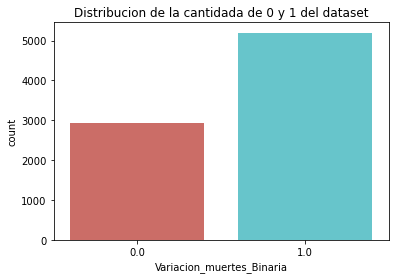

In [308]:
# Grafico la distribucion de la cantidada de 0 y 1
# =============================================================================
sns.countplot(x=y_muertes, palette='hls')
plt.title('Distribucion de la cantidada de 0 y 1 del dataset')
plt.show()

En este caso la cantidad de 0 y 1 para la variable binaria de muertes es mas discrepante que la que se observo en el analisis para los casos de COVID

In [127]:
#Entreno el modelos teniendo dividiento el dataset en un 30% para entrenar (train_test_split)
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(X_muertes, y_muertes, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5691, 3) (5691,) (2440, 3) (2440,)


In [128]:
#creamos nuestro modelo y hacemos que se ajuste con el fit
# =============================================================================
model_RL = LogisticRegression()
model_RL.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
#hacemos clasificar todo nuestro conjunto de entradas X utilizando el método predict(X)
# =============================================================================
y_pred = model_RL.predict(X_test) #predictions = y_pred
print(y_pred)
y_test

[1. 1. 1. ... 1. 1. 1.]


4522     0.0
13701    1.0
51502    1.0
74707    0.0
50076    1.0
        ... 
4027     0.0
21248    1.0
65988    1.0
3682     1.0
14099    0.0
Name: Variacion_muertes_Binaria, Length: 2440, dtype: float64

In [130]:
# Observamos que clasificador funciono mejor
# =============================================================================
valor = model_RL.coef_
efectividad_cuarentena = valor[0][0]
efectividad_cierre_frontera = valor[0][1]
efectividad_vacunacion = valor[0][2]

In [131]:
valor

array([[ 1.32543466, -0.00421784,  0.01473229]])

In [132]:
# Observo la efectividad de cada politica seleccionada
# =============================================================================
print('La efectividad de la cuarentena fue del: ' + str(efectividad_cuarentena))
print('La efectividad del cierre de la frontera fue del: ' + str(efectividad_cierre_frontera))
print('La efectividad de la vacunacion fue del: ' + str(efectividad_vacunacion))

La efectividad de la cuarentena fue del: 1.3254346643991997
La efectividad del cierre de la frontera fue del: -0.004217837828519814
La efectividad de la vacunacion fue del: 0.014732294145002024


Para el caso de las muertes por covid la politica de cuarentena fue la que mejor funciono, seguida por la de vacunacion. Este ultimo es cercano a 0 lo que implica que el efecto del predictor es pequeño.

En el caso de cierre de frontera el coeficiente es negativo por lo que lo hace un predictor poco probable.

# Nuevas predicciones - Clasificación de nuevos paises - Muertes causadas por COVID

In [133]:
# =============================================================================
paises_nuevo_seleccionar = ['France', 'Netherlands', 'Canada'] # 'Venezuela', 'South Africa', 'South Africa', 'Costa Rica', 'Colombia', 'Austria', 'Cuba', 'United Kingdom', 'Canada'
Paises_nuevo = datos_final[datos_final['Entity'].isin(paises_nuevo_seleccionar)]
Paises_nuevo

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos_por_día,Variación_casos,Variacion_Casos_Binaria,Muertes_por_día,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
18005,Canada,CAN,2020-01-31,0.0000,tests performed,0.0001,4.0,-62.0,-72.0,1.0,0.0,0.0,1.0,0,0,0
18006,Canada,CAN,2020-02-08,63.0000,tests performed,0.0001,7.0,3.0,65.0,0.0,0.0,0.0,1.0,0,0,0
18007,Canada,CAN,2020-02-16,109.0000,tests performed,0.0001,7.0,0.0,-3.0,1.0,0.0,0.0,1.0,0,0,0
18008,Canada,CAN,2020-02-21,166.0000,tests performed,0.0001,9.0,2.0,2.0,0.0,0.0,0.0,1.0,0,0,0
18009,Canada,CAN,2020-02-24,212.0000,tests performed,0.0001,10.0,1.0,-1.0,1.0,0.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72123,Netherlands,NLD,2020-03-01,0.0001,0.0001,0.0001,10.0,4.0,-1.0,1.0,0.0,0.0,1.0,0,0,0
72124,Netherlands,NLD,2020-03-02,0.0001,0.0001,0.0001,18.0,8.0,4.0,0.0,0.0,0.0,1.0,0,0,0
72125,Netherlands,NLD,2020-03-03,0.0001,0.0001,0.0001,24.0,6.0,-2.0,1.0,0.0,0.0,1.0,0,0,0
72126,Netherlands,NLD,2020-03-04,0.0001,0.0001,0.0001,38.0,14.0,8.0,0.0,0.0,0.0,1.0,0,0,0


In [134]:
# =============================================================================
Paises_nuevo.Entity.unique()

array(['Canada', 'France', 'Netherlands'], dtype=object)

In [135]:
# =============================================================================
X_nuevo_muertes = Paises_nuevo.drop(columns = ['Entity','Code','Day','total_tests','142601-annotations','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19','Casos_por_día','Variación_casos','Variacion_Casos_Binaria', 'Muertes_por_día', 'Variación_muertes', 'Variacion_muertes_Binaria'], axis=1) #aca van los indicarotes/politicas
y_nuevo_muertes = Paises_nuevo['Variacion_muertes_Binaria'] #cantidad de casos en binario
X_nuevo_muertes


,stay_home_requirements,international_travel_controls,vaccination_policy
18005,0,0,0
18006,0,0,0
18007,0,0,0
18008,0,0,0
18009,0,0,0
...,...,...,...
72123,0,0,0
72124,0,0,0
72125,0,0,0
72126,0,0,0


In [136]:
# PREDICCION DETERMINISTICA
#hacemos clasificar todo nuestro conjunto de entradas X utilizando el método predict(X)
# =============================================================================
predictions = model_RL.predict(X_nuevo_muertes) #predictions = y_pred
# print(predictions)
predictions

array([1., 1., 1., ..., 1., 1., 1.])

- COMO DA TODOS 1 LOS CASOS DISMINUIRIAN CON LAS 3 POLITICAS SELECCIONADAS DE VACUNACION, CUARENTENA Y CIERRE DE FRONTERAS

In [137]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_nuevo, predictions,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,1.0
Real,
0.0,862
1.0,1148


In [138]:
# PREDICCION PROBABILISTICA
# =============================================================================
probabilidades_prediccion = model_RL.predict_proba(X_nuevo_muertes)
print(probabilidades_prediccion)
# la primer columna es la probabilidad de 0, o sea la probabilidad de mas contagios
# la primer columna es la probabilidad de 1, o sea la probabilidad de menos contagios

[[0.38066364 0.61933636]
 [0.38066364 0.61933636]
 [0.38066364 0.61933636]
 ...
 [0.38066364 0.61933636]
 [0.38066364 0.61933636]
 [0.38066364 0.61933636]]


In [139]:
# Como nos interesa la segunda columna que es la de disminucion de casos la observo
# =============================================================================
print(probabilidades_prediccion[:,1])

[0.61933636 0.61933636 0.61933636 ... 0.61933636 0.61933636 0.61933636]


Al igual que el analisis de los casos de COVID, la cantidad de 1 es de manera determinista mayor o probabilisticamente con una probabilidad mayor, por lo que concluyo que las politicas seleccionadas funcionan para prevenir las muertes por COVID.

Esto puede deberse, tanto para los casos como para la prevencion de muertes, porque las 3 politicas seleccionadas son quizas las mas aplicadas en el mundo y en los paises en general, y aquellas que pueden modificar el crecimiento exponencial y dispersion de los casos a traves de la sociedad y el mundo.

# Tercera parte: Elaboración de Informe Final

Para finalizar, elabora un informe sobre lo que significa el parámetro de crecimiento y con qué estrategias epidemiológicas puede modificarse. Por un lado, debes mencionar si es posible elaborar un análisis estadístico que brinde información sobre lo que pasa en todo el mundo a partir del estudio de algunos casos particulares. Por otro lado, también debes discutir si es posible identificar las políticas adoptadas por los países a partir del clasificador que armaste. Debes debatir en el informe sobre las razones por las cuales lo que hayas hecho funciona o no, en las dos partes previas del trabajo.

Recuerda incluir distintos gráficos, histogramas, ajustes de modelos, evolución de los contagios o cualquier cosa que se te ocurra, para argumentar en tu informe.


# Parte 3 - Investigación

- Debes explicar qué te gustaría probar, por qué y cómo lo harías. Si tienes referencias (por ejemplo, un artículo que hayas encontrado, capítulo de libro, etc.) debes mencionarlas.
- Debes comentar también qué resultados esperas encontrar. Por ejemplo, puedes implementar una prueba rápida y mostrar resultados preliminares, para ver si estás correctamente orientado.
- Debes elaborar un informe que condense y explique todo tu trabajo.

### Informe Final del SPRINT 4

Para esta ultima parte de investigacion y discusion, creo que el avance generado en este Sprint pone de manifiesto muchas observaciones de la pandemia, tanto respecto al mundo, como a diferentes paises y respecto a las politicas mas utilizadas para afrontar el COVID.

En primer lugar, creo que al observar de manera amplica el dataset del covid, es un desafio poder integrar o establecer de manera efectiva para cada pais en estudio el momento en el que empezo la pandemia, que cantidad de informacion acerca del COVID tenian en ese momonto, que diponibilidad y eficacia en los testeos tenian, y que politicas adoptaron cada uno y de que manera; porque tanto aqui como en portales de informacion se pudo observar que los diferentes paises aplicaron diferentes estrategias en determinados momentos y oportunidades.

De esto puedo desprender las preguntas que me genera esto para poder establecer una forma mas objetiva y efectiva para determinar si las politicas de los paises fueron efectivas o no. Por ejemplo:
- Establecer el primer contagio en cada region, pais o provincia.
- Establecer que politica restrictiva se aplico al inicio de un contagio cuan estricto fue en ese momento.
- Establecer la cantidad de testeos al inicio de la pandemia y cuan efectivos fueron en ese momento; ya que al principio de la misma los testeos no eran de manera masiva como ahora y los test eran de sondeo epidemiologio, lo que daba una efectividad muy reducida de deterctar verdaderos positivos
- ¿Todos los paises fueron anotado y registrado de manera diaria sus contagios, politicas, muertes y testeos? Este es un punto para tener en cuenta porque en muchos paises y regiones el presonal de salud y de administracion no siempre estuvo al dia para poder actualizar los datos e informes de la pandemia. Esto puede generar errores luego en los calculos y predicciones de los modelos por ejemplo.
- Creo que la Cuarentena es una medida efectiva, pero se aplico de manera dispar tanto en diferentes paises como regiones, y es ademas algo que la gente no esta muy dispuesta a poner en juego con su libertad.
- Por ultimo, las vacunas vieneron a cambiar el panorama global, ya que son muy efectivas por lo que puede observarse en los ultimos dias. La cantidad de casos diarios crece de manera exagerada a pesar que las muertes no siguen (por ahora) el mismo ritmo de aumentos

Con todas estas observaciones y/preguntas uno podria seguir urgando y profundizando acerca de este tipo de pandemia, contagios y casos, estrategias y politicas para la reduccion de los mismos y como seguir afrontado dicho fenomeno buscando la manera mas rapida y efectiva para salir de esta situacion.

Respecto al informe final de este Sprint proyecto pudo observarse la cantidad de paises relevados, la cantidad de casos y muertes por COVID. Sabiendo la forma en la que se propaga el virus puede establecerse su valor de k que se refiere a como prolifera en sus huesped. La mayoria de estos microorganismos tiene una fase de latencia que es en donde comienza a colonizar y distribuirse, pasando luego a una fase exponencial, que es en donde crece al maximo de su posibilidad y a medida de que los hospedantes se infectan la curva exponencial pasa a aplanarse ya que no hay mas personas para infectar. En nuestro caso aplanar la curva de contagios estaba relacionado a la aplicacion de pliticas como la cuarentena para disminucior la propagacion del COVID y su distribucuion.
El analisis del K del mundo dio un valor de 0.0171; en el caso de un pais en particular como Argentina dio 0.0314. Esto puede deberse a que se selecciono una ventana de tiempo de 100 a 220 dias, por lo que muchos paises en el mundo aun no presentaban contagios y eso hace que el k mundia sea menor. Para establecer un nivel de confianza de este valor se establecio un intervalo de confianza (IC) para diez paises seleccionados con diferentes politicas utilizadas y que presentaron casos en diferentes momentos y por el otro lado se hizo lo mismo pero con 147 paises al azar del mundo, y el valor del IC 0.005090310568673094 - 0.017111011562064037 y 0.01002524171470153 - 0.01325202737718382 respectivamente. Claramente al agregar mas paises el intervalo de confianza es mas preciso por lo que la variacion o diferencia entre el mayor y menor valor disminuye considerablemente y me asegura de moverme entre un rango de valor mas estrecho. A pesar de esto, tanto el parametro k mundial como el parametro k de los 10 paises caen por fuera del rango del IC por el lado de los valores extremos.

En relacion a las politicas elegidas de Cuarentena, vacunacion y cierre de frontera, estas tuvieron diferentes aportes por lo estudiado y predecido en los modelos llevados a cabo, tanto para los casos de covid como para las muertes generadas por covid.
Para los casos de covid usando el modelo de regresion logistica y las 3 politicas seleccionadas en los 10 paiese de interes, estas 3 politicas mostraron diferenetes efectividad como clasificador:
- La efectividad de la cuarentena fue del: 0.007819693594811813
- La efectividad del cierre de la frontera fue del: -0.15049648949878922
- La efectividad de la vacunacion fue del: 0.10300199484159982

El mejor predictor fue el de vacunacion que es el que mejor funciono, seguido por el de cuarentena. Ambos reflejan valores es pequeños, lo que implica que el efecto o aporte es relativamente poco a medio considerable, ya que cuanto mayores sean matores son las probabilidades respecto al evento de referencia tomado. En el caso de cierre de frontera el coeficiente es negativo por lo que lo hace un predictor poco probable de que ocurra.

En el caso de muertes generadas por covid el modelo de regresion logistica y las 3 politicas seleccionadas en los 10 paiese de interes mostraron lo siguente:
- La efectividad de la cuarentena fue del: 1.3254346643991997
- La efectividad del cierre de la frontera fue del: -0.004217837828519814
- La efectividad de la vacunacion fue del: 0.014732294145002024

El mejor predictor para este caso fue el de cuarentena que es el que mejor funciono y mostro un valor considerable, seguido por el de vacunacion en menor medida. En el caso de cierre de frontera mostro el mismo comportamiento que para el estudio llevado a cabo para la prediccion de casos generados por covid.

Teniendo en caso esto, la politica de cuarentena es la mejor para prevenir los casos de muertes por covid, ya que en comparacion al valor de refencia establecido esta politica cambia la variable de referencia aumentando el logaritmo natural de la probabilidad del evento en 1.3254346643991997. 

Este estudio podria profundizarse aun mas, pero generando una nueva prediccion con nuevos paises no usados en el modelo para su entrenamiento (Fracia, Canada y Países Bajos) se obtiene tanto de manera determinista como probabilistica que las politicas seleccionadas funcionan tanto para disminuir los casos como las muertes por covid, y por ende disminuir el avance de la pandemia.



Para finalizar, dejo el link aqui con la direccion de enlace al github personal en donde esta depositado este Sprint Nº4 en el repositorio.

https://github.com/PaoloCacchiarelli/Sprint-4_covid

Sin mas, 

Saluda atentamente!

*Paolo Cacchiarelli*